In [57]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, Activation 
from keras.models import load_model
import glob
import os

In [58]:
# getting training data
!wget "https://www.dropbox.com/s/lbobq9xt3nchq5q/train.rotfaces.zip"

--2020-09-04 12:05:08--  https://www.dropbox.com/s/lbobq9xt3nchq5q/train.rotfaces.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lbobq9xt3nchq5q/train.rotfaces.zip [following]
--2020-09-04 12:05:09--  https://www.dropbox.com/s/raw/lbobq9xt3nchq5q/train.rotfaces.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc811ca3b4a9992c8541aae1947c.dl.dropboxusercontent.com/cd/0/inline/A-umsBdNnJbVE0xpndSljhkf33Qpn6zCyonskD_ofxImGcdbtnr4yin6vf8HbgQ4a9qpRjWl-er_GDqrURnICJJza95rK_RsKzw1crIvHUrGjA/file# [following]
--2020-09-04 12:05:09--  https://uc811ca3b4a9992c8541aae1947c.dl.dropboxusercontent.com/cd/0/inline/A-umsBdNnJbVE0xpndSljhkf33Qpn6zCyonskD_ofxImGcdbtnr4yin6vf8HbgQ4a9qpRjWl-er_GDqrURnICJJza95rK_RsKzw1crIvHUrGjA/file
R

In [59]:
# getting testing data
!wget "https://www.dropbox.com/s/ustfubunhfe47mj/test.rotfaces.zip"

--2020-09-04 12:05:13--  https://www.dropbox.com/s/ustfubunhfe47mj/test.rotfaces.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ustfubunhfe47mj/test.rotfaces.zip [following]
--2020-09-04 12:05:13--  https://www.dropbox.com/s/raw/ustfubunhfe47mj/test.rotfaces.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2c4cf52f32e0b8b2a33d9a1f17.dl.dropboxusercontent.com/cd/0/inline/A-uo6UIOLiNsb_v5BlQwHxOOuvD7kFBYDzKg-hYvgP2MOTR_DW-wuCSCeMEby-q7JNw6i-hskv9n6PGDVbchfWPme1WaTbY39SbCS5C4d3HSsQ/file# [following]
--2020-09-04 12:05:14--  https://uc2c4cf52f32e0b8b2a33d9a1f17.dl.dropboxusercontent.com/cd/0/inline/A-uo6UIOLiNsb_v5BlQwHxOOuvD7kFBYDzKg-hYvgP2MOTR_DW-wuCSCeMEby-q7JNw6i-hskv9n6PGDVbchfWPme1WaTbY39SbCS5C4d3HSsQ/file
Reso

In [60]:
# unzipping files
!unzip train.rotfaces.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/81-860581_1921-09-30_1992.jpg  
 extracting: train/81-8614381_1931-07-29_2012.jpg  
 extracting: train/81-8649881_1982-09-08_2009.jpg  
 extracting: train/81-871281_1981-03-02_2010.jpg  
 extracting: train/81-8854681_1958-09-05_2014.jpg  
 extracting: train/81-8875281_1988-06-06_2013.jpg  
 extracting: train/81-8920481_1927-04-03_1956.jpg  
 extracting: train/81-8986681_1967-09-25_1960.jpg  
 extracting: train/81-9078381_1987-06-12_2010.jpg  
 extracting: train/81-9154081_1902-03-23_1950.jpg  
 extracting: train/81-9233381_1974-12-24_2013.jpg  
 extracting: train/81-928681_1981-09-07_2012.jpg  
 extracting: train/81-9290681_1958-04-18_1987.jpg  
 extracting: train/81-93781_1949-03-02_2004.jpg  
 extracting: train/81-950281_1967-10-01_2004.jpg  
 extracting: train/81-9729281_1987-08-03_2012.jpg  
 extracting: train/81-97581_1972-02-29_1993.jpg  
 extracting: train/81-9928081_1942-12-14_1966.jpg  
 extracting: train/81

In [61]:
# unzipping files
!unzip test.rotfaces.zip

Streaming output truncated to the last 5000 lines.
 extracting: test/90-40066990_1979-07-26_1970.jpg  
 extracting: test/90-40169590_1996-02-11_2014.jpg  
 extracting: test/90-40236790_1976-03-28_2013.jpg  
 extracting: test/90-40552890_1990-07-25_2013.jpg  
 extracting: test/90-40663390_1993-10-20_2014.jpg  
 extracting: test/90-40720890_1991-08-17_2013.jpg  
 extracting: test/90-40767290_1995-01-29_2015.jpg  
 extracting: test/90-40780290_1932-09-12_1960.jpg  
 extracting: test/90-408190_1940-02-24_1971.jpg  
 extracting: test/90-409190_1902-01-05_1980.jpg  
 extracting: test/90-40962790_1986-01-01_2013.jpg  
 extracting: test/90-4102590_1986-04-04_2007.jpg  
 extracting: test/90-41046290_1991-09-20_2014.jpg  
 extracting: test/90-4111190_1951-09-17_2006.jpg  
 extracting: test/90-41148490_1909-02-12_1945.jpg  
 extracting: test/90-41200990_1979-01-16_2013.jpg  
 extracting: test/90-41265690_1989-07-22_2014.jpg  
 extracting: test/90-41284590_1987-03-04_2014.jpg  
 extracting: test/9

In [62]:
# getting file names and labels
data = pd.read_csv('./train.truth.csv')
fnames = data["fn"]
fnames.head()

0    0-10049200_1891-09-16_1958.jpg
1    0-10110600_1985-09-17_2012.jpg
2    0-10126400_1964-07-07_2010.jpg
3     0-1013900_1917-10-15_1960.jpg
4    0-10166400_1960-03-12_2008.jpg
Name: fn, dtype: object

In [63]:
images = []
for fname in fnames:
  img = './train/' + fname
  images.append(cv2.imread(img, 1))

In [64]:
# label encoding
data = LabelEncoder().fit_transform(data['label'])
data = np.array(data)

In [65]:
# data splitting
train_x, test_x, train_y, test_y = train_test_split(images, data, test_size = 0.20)
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [66]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [67]:
train_x = train_x.astype('float32')
train_y = train_y.astype('float32')
test_x = test_x.astype('float32')
test_y = test_y.astype('float32')

In [68]:
# normalising
train_x /= 255
test_x /= 255

In [69]:
width = 64
height = 64

In [73]:
# custom CNN model
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation="relu", input_shape = (width, height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 256, kernel_size = (1, 1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 4, activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)       

In [74]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [75]:
model_history = model.fit(train_x, train_y, 
                          batch_size = 32, 
                          epochs = 10, 
                          validation_data = (test_x,test_y),
                          verbose = 1)

Epoch 1/10
1223/1223 [==============================] - 7s 6ms/step - loss: 1.2170 - accuracy: 0.3822 - val_loss: 0.6907 - val_accuracy: 0.7165
Epoch 2/10
1223/1223 [==============================] - 7s 6ms/step - loss: 0.5777 - accuracy: 0.7698 - val_loss: 0.3649 - val_accuracy: 0.8600
Epoch 3/10
1223/1223 [==============================] - 7s 6ms/step - loss: 0.4177 - accuracy: 0.8346 - val_loss: 0.2918 - val_accuracy: 0.8863
Epoch 4/10
1223/1223 [==============================] - 7s 6ms/step - loss: 0.3177 - accuracy: 0.8768 - val_loss: 0.1814 - val_accuracy: 0.9355
Epoch 5/10
1223/1223 [==============================] - 7s 6ms/step - loss: 0.2468 - accuracy: 0.9107 - val_loss: 0.1330 - val_accuracy: 0.9515
Epoch 6/10
1223/1223 [==============================] - 7s 6ms/step - loss: 0.2039 - accuracy: 0.9266 - val_loss: 0.1064 - val_accuracy: 0.9621
Epoch 7/10
1223/1223 [==============================] - 7s 6ms/step - loss: 0.1803 - accuracy: 0.9346 - val_loss: 0.0966 - val_accuracy:

In [86]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

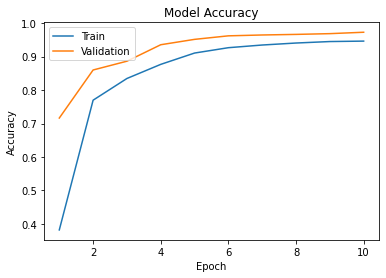

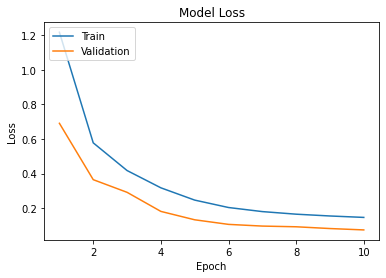

In [87]:
# Model Performance graph
plotLearningCurve(model_history, 10)

In [88]:
model.save("cnn_model.h5")

In [89]:
cnn = load_model("cnn_model.h5")

In [90]:
correctedImages = []

In [91]:
# function to rotate images upright
def rotateImage(model,image):
  input = image.reshape(1, 64, 64, 3)
  output = model.predict(input)
  value = output.argmax()
  angle = 0
  
  if value == 1: 
    angle = 90
  elif value == 0: 
    angle = 270 
  elif value == 3: 
    angle = 180
  
  center = tuple(np.array(image.shape[1::-1]) / 2)
  rotationMatrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  result = cv2.warpAffine(image, rotationMatrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [92]:
# CIFAR10 CNN Model
cifar10_cnn = Sequential()
cifar10_cnn.add(Conv2D(32, (3, 3), padding='same', input_shape= (width, height, 3)))
cifar10_cnn.add(Activation('relu'))
cifar10_cnn.add(Conv2D(32, (3, 3)))
cifar10_cnn.add(Activation('relu'))
cifar10_cnn.add(MaxPool2D(pool_size=(2, 2)))
cifar10_cnn.add(Dropout(0.25))

cifar10_cnn.add(Conv2D(64, (3, 3), padding='same'))
cifar10_cnn.add(Activation('relu'))
cifar10_cnn.add(Conv2D(64, (3, 3)))
cifar10_cnn.add(Activation('relu'))
cifar10_cnn.add(MaxPool2D(pool_size=(2, 2)))
cifar10_cnn.add(Dropout(0.25))

cifar10_cnn.add(Flatten())
cifar10_cnn.add(Dense(512))
cifar10_cnn.add(Activation('relu'))
cifar10_cnn.add(Dropout(0.5))
cifar10_cnn.add(Dense(4))
cifar10_cnn.add(Activation('softmax'))

cifar10_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 31, 31, 64)       

In [93]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [94]:
cifar10_cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [95]:
cifar10_cnn_history = cifar10_cnn.fit(train_x, train_y, 
                          batch_size = 32, 
                          epochs = 10, 
                          validation_data = (test_x,test_y),
                          verbose = 1)

Epoch 1/10
1223/1223 [==============================] - 17s 14ms/step - loss: 0.5104 - accuracy: 0.7989 - val_loss: 0.2389 - val_accuracy: 0.9096
Epoch 2/10
1223/1223 [==============================] - 17s 14ms/step - loss: 0.2030 - accuracy: 0.9280 - val_loss: 0.1348 - val_accuracy: 0.9543
Epoch 3/10
1223/1223 [==============================] - 17s 14ms/step - loss: 0.1315 - accuracy: 0.9554 - val_loss: 0.0997 - val_accuracy: 0.9650
Epoch 4/10
1223/1223 [==============================] - 17s 14ms/step - loss: 0.0999 - accuracy: 0.9662 - val_loss: 0.0981 - val_accuracy: 0.9643
Epoch 5/10
1223/1223 [==============================] - 17s 14ms/step - loss: 0.0816 - accuracy: 0.9721 - val_loss: 0.0768 - val_accuracy: 0.9720
Epoch 6/10
1223/1223 [==============================] - 17s 14ms/step - loss: 0.0706 - accuracy: 0.9760 - val_loss: 0.0798 - val_accuracy: 0.9725
Epoch 7/10
1223/1223 [==============================] - 17s 14ms/step - loss: 0.0626 - accuracy: 0.9785 - val_loss: 0.0665 -

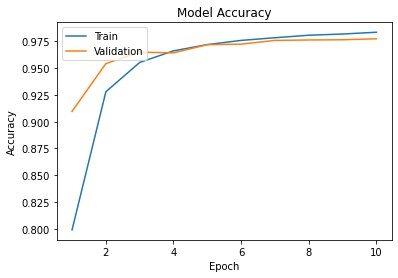

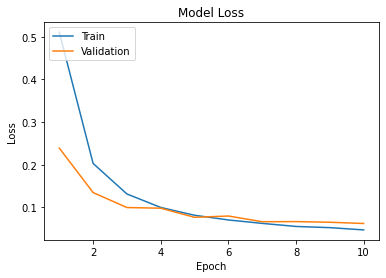

In [96]:
# Model Performance Graph
plotLearningCurve(cifar10_cnn_history, 10)

In [97]:
model.save("cifar10_cnn_model.h5")

In [100]:
# Rotating all testing images upright and treating a numpy array output
for file in glob.glob("./test/*.jpg"):
  img = cv2.imread(file, 1)
  rotatedImage = rotateImage(cnn, img)
  correctedImages.append(rotatedImage)
    
correctedImages = np.array(correctedImages)
np.save('array', correctedImages)

TypeError: ignored

In [99]:
# Rotating all test set images and saving them as PNGs
testPath = "/content/test/"
fileNames = os.listdir(testPath)

for fname in fileNames:
  img = './test/' + fname
  image = cv2.imread(img,1)
  path = "/content/testTruth/"
  image = rotateImage(cnn, image)
  fileName = fname[:-4] + ".png"
  cv2.imwrite(os.path.join(path , fileName), image)

In [104]:
# zipping transformed images
!zip -r /content/testTruth.zip /content/testTruth/

Streaming output truncated to the last 5000 lines.
  adding: content/testTruth/93-22064193_1986-12-15_2008.png (stored 0%)
  adding: content/testTruth/90-292590_1968-05-01_1993.png (deflated 6%)
  adding: content/testTruth/97-164097_1939-04-04_2001.png (deflated 9%)
  adding: content/testTruth/97-8213797_1979-03-20_2008.png (stored 0%)
  adding: content/testTruth/98-1814598_1874-04-19_1944.png (deflated 5%)
  adding: content/testTruth/93-32198893_1936-01-12_2011.png (stored 0%)
  adding: content/testTruth/90-336790_1958-08-18_2011.png (deflated 0%)
  adding: content/testTruth/95-12509095_1985-04-26_2015.png (deflated 0%)
  adding: content/testTruth/93-5271393_1977-02-17_2012.png (deflated 13%)
  adding: content/testTruth/93-63493_1969-11-21_2009.png (deflated 2%)
  adding: content/testTruth/97-12895497_1957-05-29_2015.png (stored 0%)
  adding: content/testTruth/99-2090899_1947-05-04_2009.png (deflated 0%)
  adding: content/testTruth/97-46384797_1956-02-15_2013.png (stored 0%)
  adding:

In [101]:
# function to get prediction labels
def predictLabel(model, image):
  input = image.reshape(1, 64, 64, 3)
  output = model.predict(input)
  value = output.argmax()
  label = "upright"
  
  if value == 1: 
    label = "rotated_right"
  elif value == 0: 
    label = "rotated_left" 
  elif value == 3: 
    label = "upright_down"

  return label

In [111]:
# csv file of file names and predicted labels
preds = pd.DataFrame(columns=["fn", "label"])
for fname in fileNames:
  img = './test/' + fname
  image = cv2.imread(img,1)
  label = predictLabel(cnn, image)
  preds = preds.append({"fn":fname, "label":label}, ignore_index=True)

In [114]:
temp = preds.loc[:, ~preds.columns.str.match('Unnamed')]
temp.head()

,fn,label
0,98-2224598_1986-09-16_2005.jpg,upright_down
1,94-4274094_1978-06-10_2009.jpg,upright
2,92-2368592_1981-03-20_2009.jpg,rotated_right
3,98-275498_1927-07-02_1961.jpg,rotated_left
4,95-32535595_1937-03-02_2007.jpg,rotated_left


In [116]:
temp.to_csv("test.preds.csv", index=False)